In [1]:
# Imports
from TweetScraper import Scraper
from AnalysisFunctions import *
import csv

# collecting data

In [2]:
stocks_list = ["TSLA","AAPL","NFLX", "GME", "AMC", "RBLX", "AMZN", "NVDA", "GOOG","MSFT", "DIS", "FB",
              "ACB", "ZM", "BYND", "PTON", "SHOP", "COIN", "SPY", "VOO", "GAIN"]

stock_dict = {}

num_pages = 10

for ticker in stocks_list:
    stock_dict[ticker] = Scraper(ticker, num_pages)

### Getting correlated stocks for network building

In [4]:
correlations = {}
for ticker in stocks_list:
    correlations[ticker] = stock_dict[ticker].get_correlations(stocks_list)


with open('correlations.csv', 'w', newline='') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for source in stocks_list:
        for target in correlations[source]:
            filewriter.writerow([source.lower(), target.lower()])

# Analyzing Data

... saving TSLA wordcloud to ./wordclouds/TSLA.png
... saving AAPL wordcloud to ./wordclouds/AAPL.png
... saving NFLX wordcloud to ./wordclouds/NFLX.png
... saving GME wordcloud to ./wordclouds/GME.png
... saving AMC wordcloud to ./wordclouds/AMC.png
... saving RBLX wordcloud to ./wordclouds/RBLX.png
... saving AMZN wordcloud to ./wordclouds/AMZN.png
... saving NVDA wordcloud to ./wordclouds/NVDA.png
... saving GOOG wordcloud to ./wordclouds/GOOG.png
... saving MSFT wordcloud to ./wordclouds/MSFT.png
... saving DIS wordcloud to ./wordclouds/DIS.png
... saving FB wordcloud to ./wordclouds/FB.png
... saving ACB wordcloud to ./wordclouds/ACB.png
... saving ZM wordcloud to ./wordclouds/ZM.png
... saving BYND wordcloud to ./wordclouds/BYND.png
... saving PTON wordcloud to ./wordclouds/PTON.png
... saving SHOP wordcloud to ./wordclouds/SHOP.png
... saving COIN wordcloud to ./wordclouds/COIN.png
... saving SPY wordcloud to ./wordclouds/SPY.png
... saving VOO wordcloud to ./wordclouds/VOO.png


C:\Users\mduns\source\repos\Stocks-Sentiment-Analysis\scripts\AnalysisFunctions.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


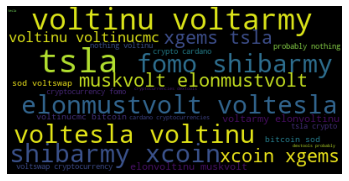

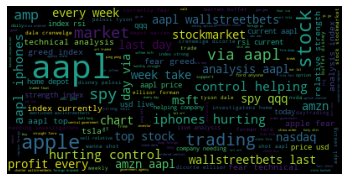

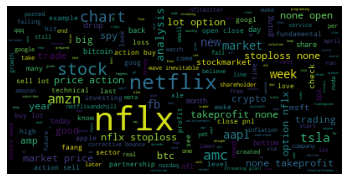

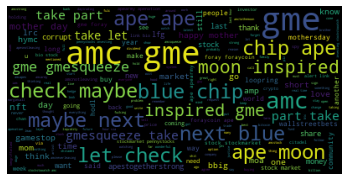

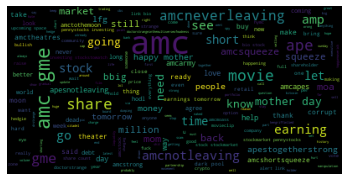

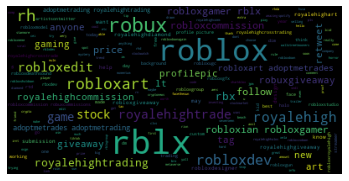

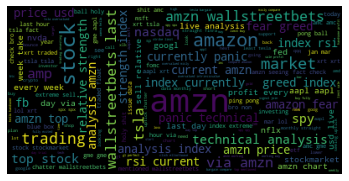

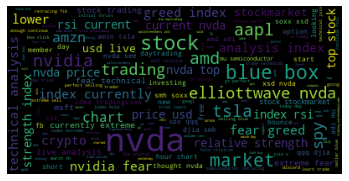

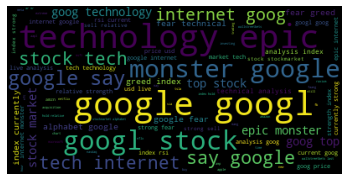

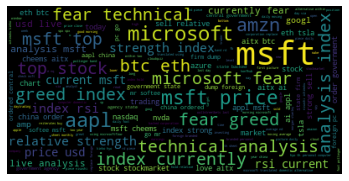

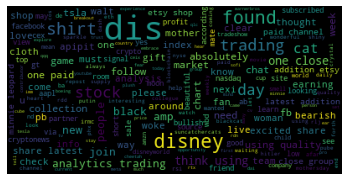

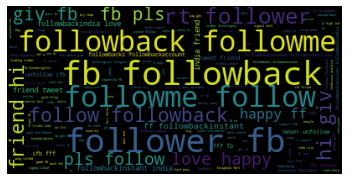

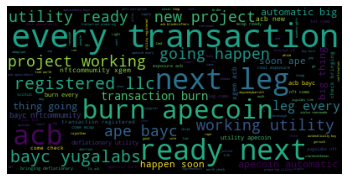

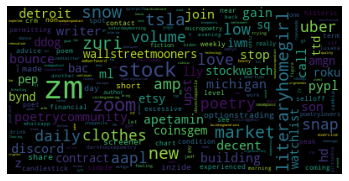

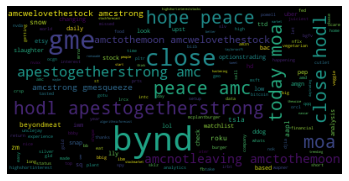

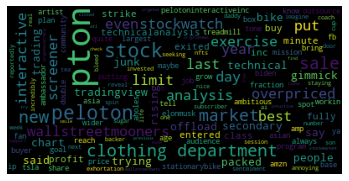

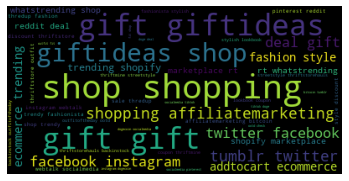

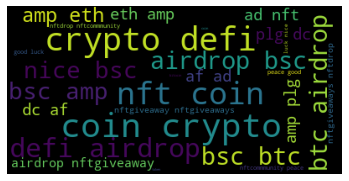

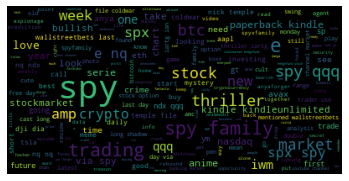

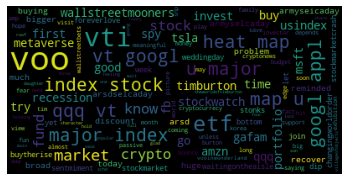

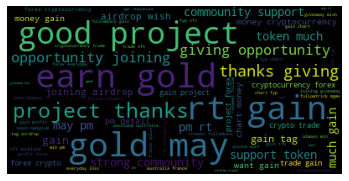

In [5]:
# dict of tweets categorized by sentiments. Returns tuple (positive_tweets, negative_tweets, neutral_tweets)
grouped_tweets = {}
overall_sentiments = {}
freq_words = {}


for ticker in stocks_list:
    grouped_tweets[ticker] = vader_sentiment_categorized(stock_dict[ticker].get())
    overall_sentiments[ticker] = vader_overall(stock_dict[ticker].get())
    freq_words[ticker] = popular_words(stock_dict[ticker].get())
    print(f"... saving {ticker} wordcloud to ./wordclouds/{ticker}.png")
    make_wordcloud(stock_dict[ticker].get(),ticker,"all")

In [6]:
# use case example
print(f"Number of positive tweets for tsla: {len(grouped_tweets['TSLA'][0])}")
print(f"Number of negative tweets for tsla: {len(grouped_tweets['TSLA'][1])}")

print(f"overall sentiment of NFLX: {overall_sentiments['NFLX']}")

print("Top 20 words for GME")
print(freq_words["GME"].most_common(20))


Number of positive tweets for tsla: 185
Number of negative tweets for tsla: 59
overall sentiment of NFLX: 0.07321692307692307
Top 20 words for GME
[('gme', 338), ('amc', 180), ('ape', 121), ('take', 86), ('let', 51), ('moon', 44), ('maybe', 43), ('next', 43), ('gmesqueeze', 43), ('check', 42), ('blue', 42), ('inspired', 42), ('chip', 41), ('part', 41), ('day', 36), ('stock', 30), ('mother', 28), ('market', 22), ('happy', 22), ('time', 20)]


# Wordcloud for positive and negative tweets

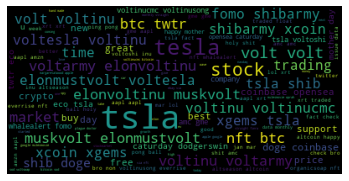

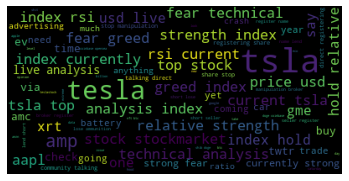

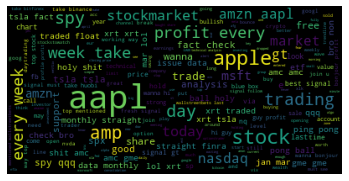

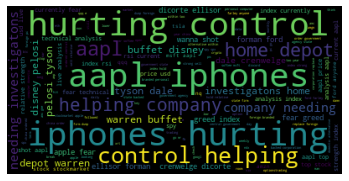

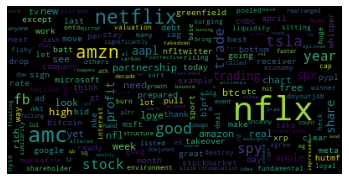

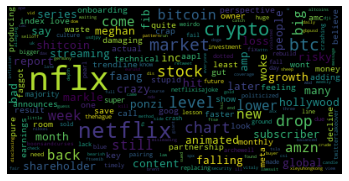

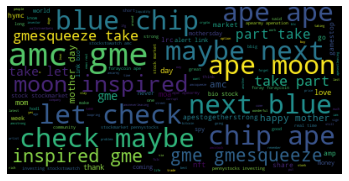

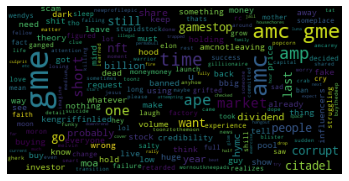

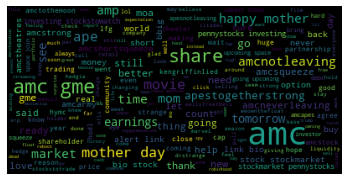

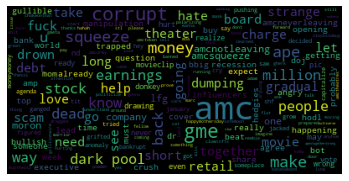

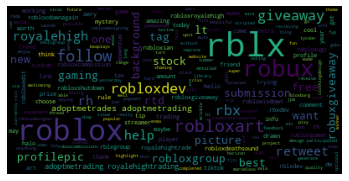

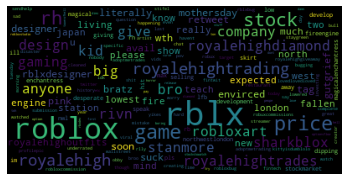

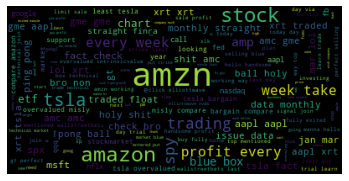

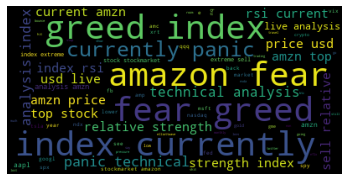

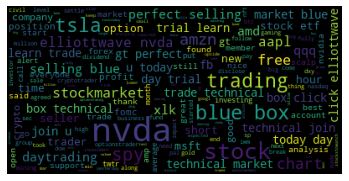

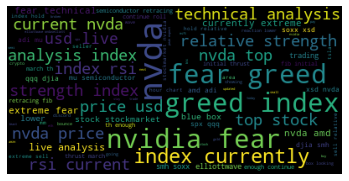

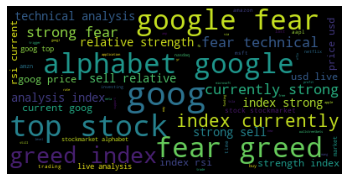

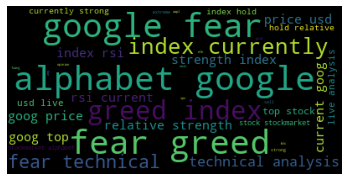

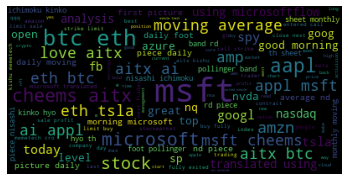

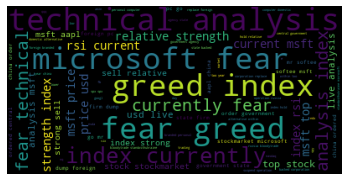

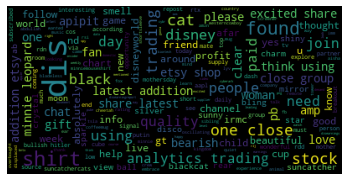

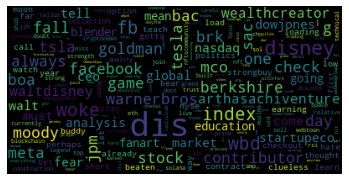

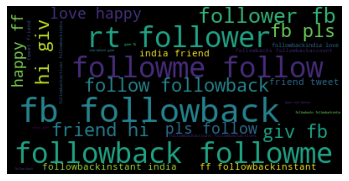

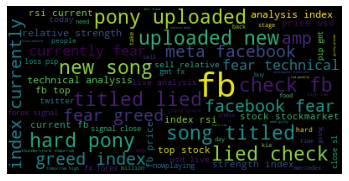

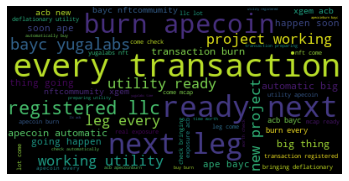

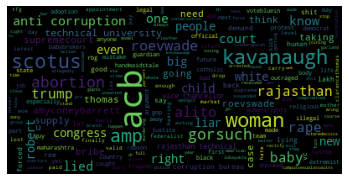

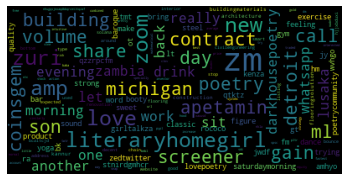

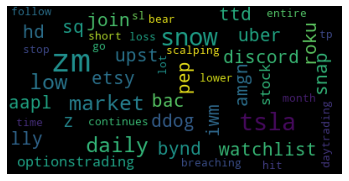

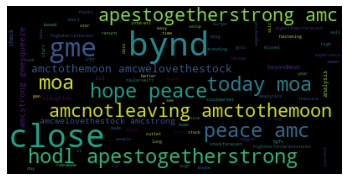

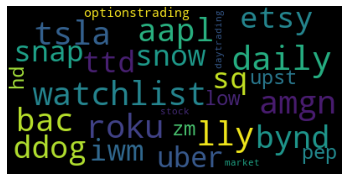

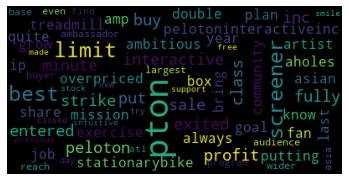

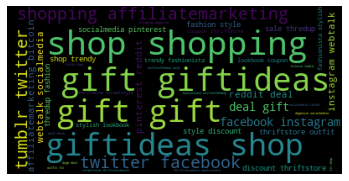

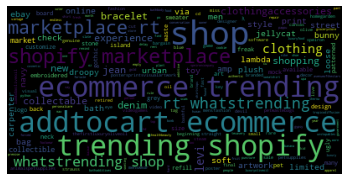

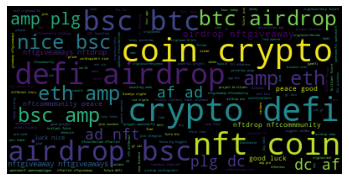

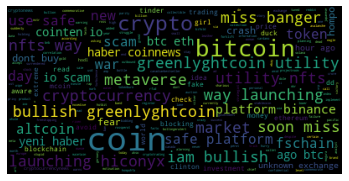

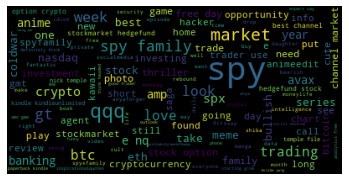

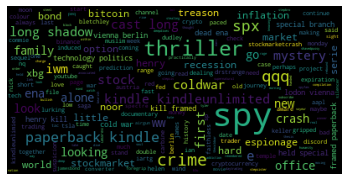

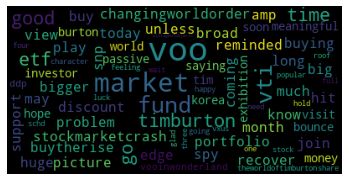

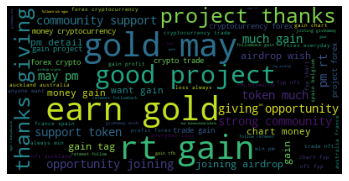

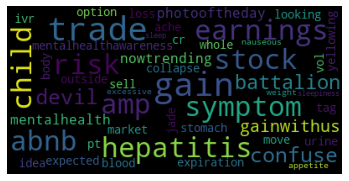

In [9]:
for ticker in stocks_list:
    if len(grouped_tweets[ticker][0]) > 0:
        make_wordcloud(grouped_tweets[ticker][0],ticker,"pos")
    if len(grouped_tweets[ticker][1]) > 0:
        make_wordcloud(grouped_tweets[ticker][1],ticker,"neg")    

# Comparing sentiments of all stocks

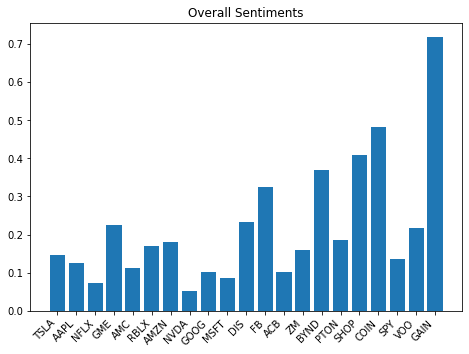

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sents = []
for i in stocks_list:
    sents.append(overall_sentiments[i])
ax.bar(stocks_list,sents)
plt.title("Overall Sentiments")
plt.xticks(rotation=45, ha='right')
plt.show()

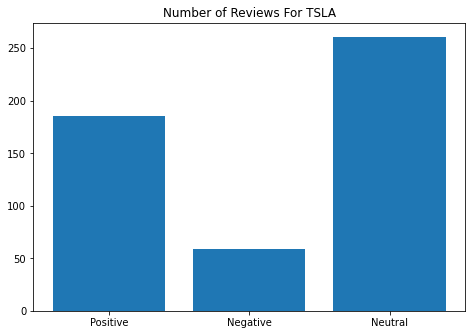

<Figure size 432x288 with 0 Axes>

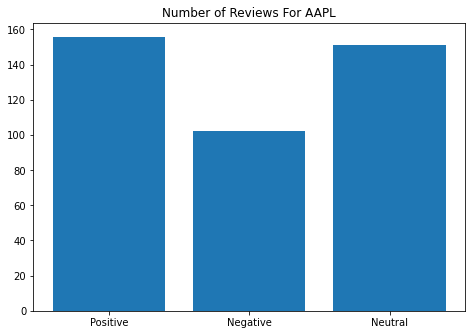

<Figure size 432x288 with 0 Axes>

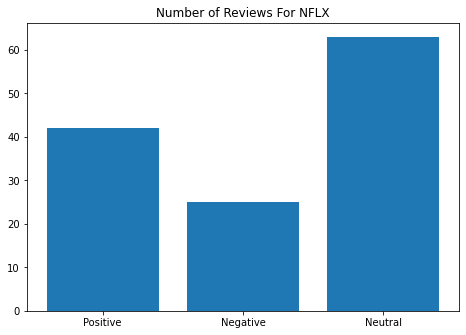

<Figure size 432x288 with 0 Axes>

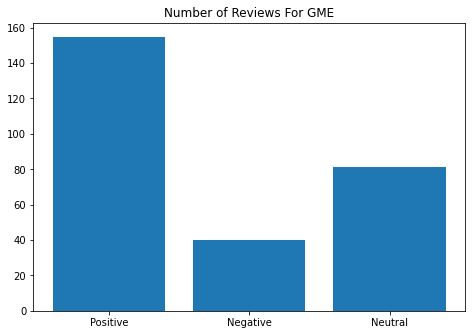

<Figure size 432x288 with 0 Axes>

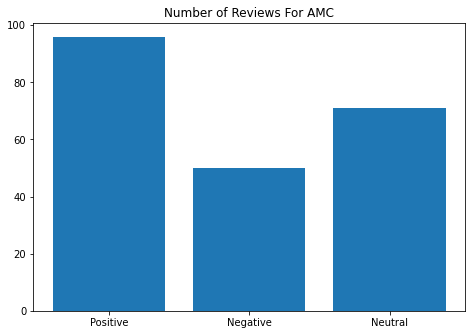

<Figure size 432x288 with 0 Axes>

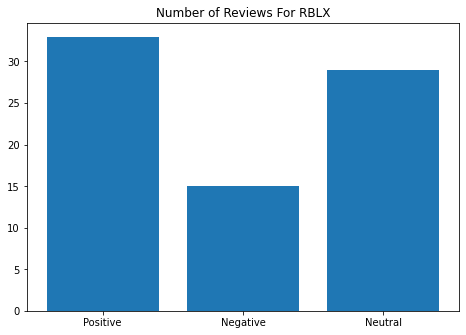

<Figure size 432x288 with 0 Axes>

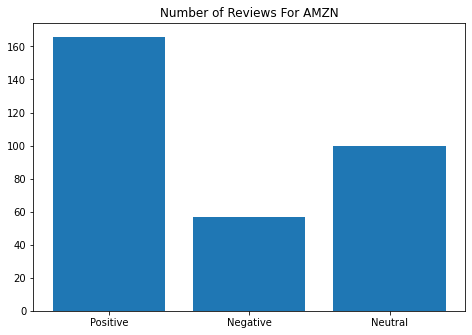

<Figure size 432x288 with 0 Axes>

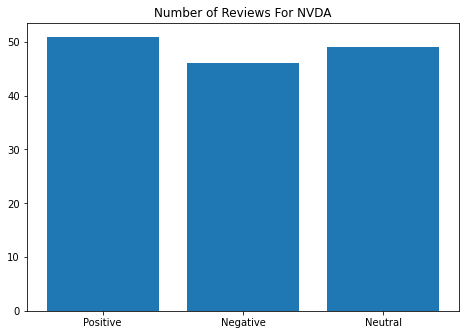

<Figure size 432x288 with 0 Axes>

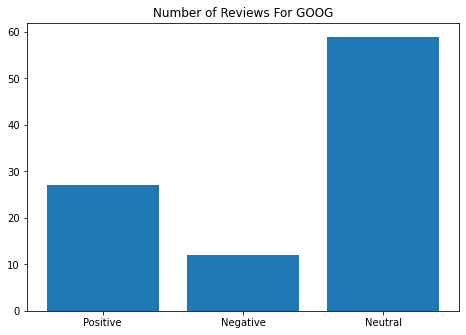

<Figure size 432x288 with 0 Axes>

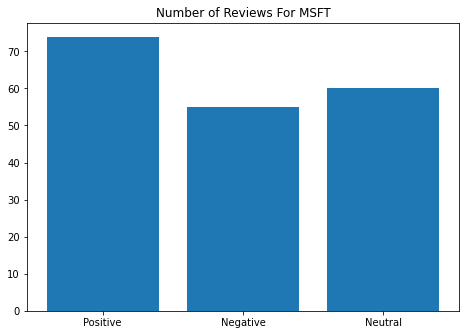

<Figure size 432x288 with 0 Axes>

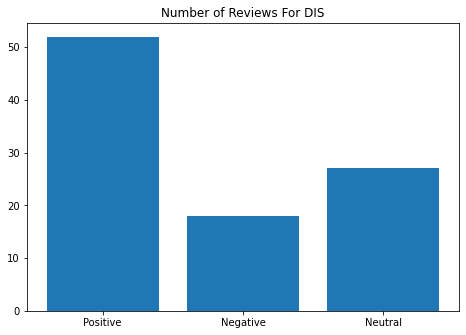

<Figure size 432x288 with 0 Axes>

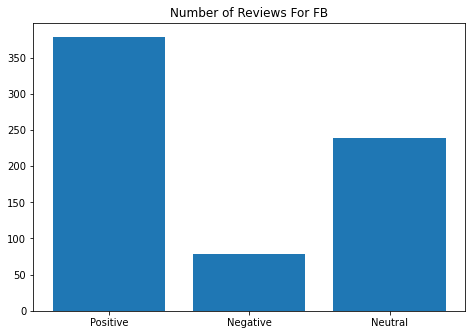

<Figure size 432x288 with 0 Axes>

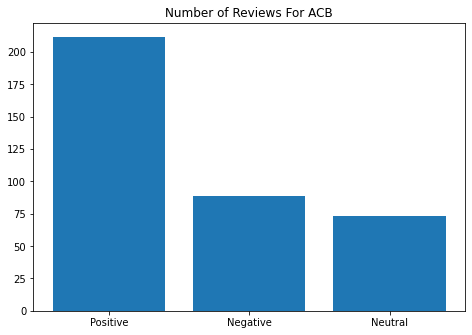

<Figure size 432x288 with 0 Axes>

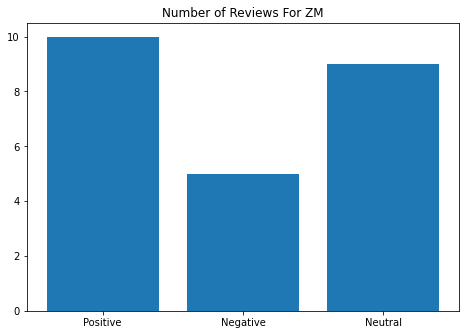

<Figure size 432x288 with 0 Axes>

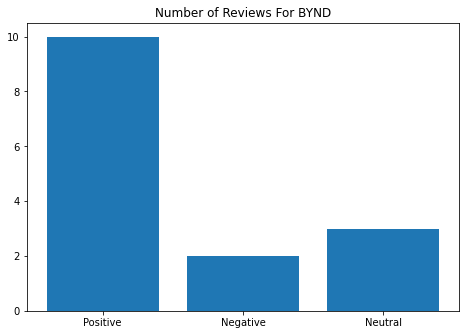

<Figure size 432x288 with 0 Axes>

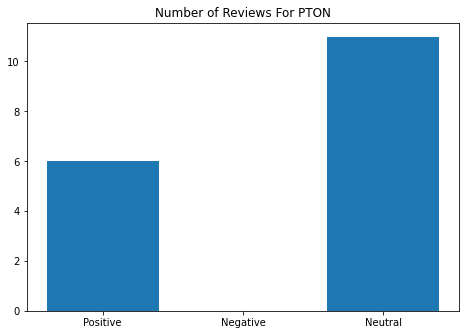

<Figure size 432x288 with 0 Axes>

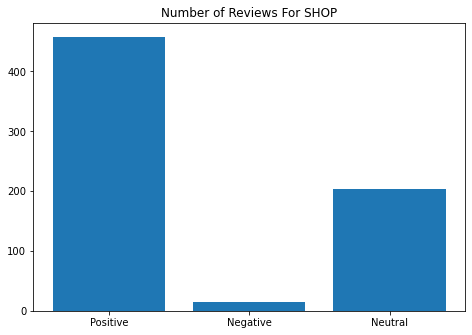

<Figure size 432x288 with 0 Axes>

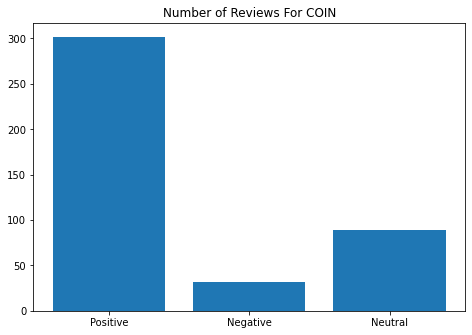

<Figure size 432x288 with 0 Axes>

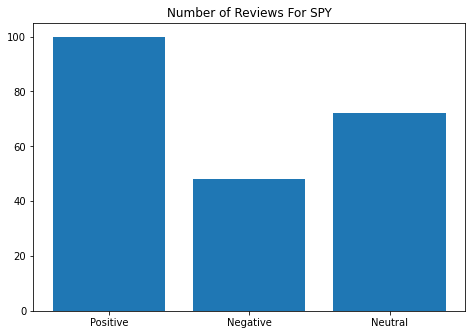

<Figure size 432x288 with 0 Axes>

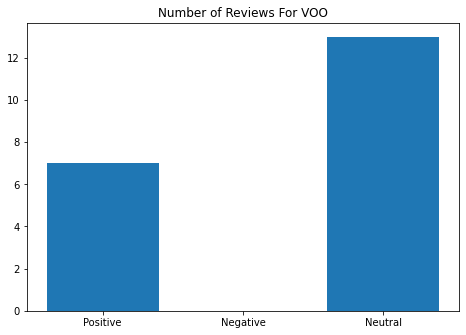

<Figure size 432x288 with 0 Axes>

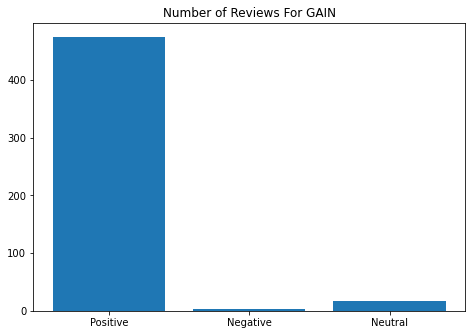

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt


sents = []
for i in stocks_list:
    sents.append(overall_sentiments[i])
    fig = plt.figure()
    numReviews = [len(grouped_tweets[i][0]), len(grouped_tweets[i][1]), len(grouped_tweets[i][2])]
    ax = fig.add_axes([0,0,1,1])
    ax.bar(["Positive", "Negative", "Neutral"],numReviews)
    plt.title("Number of Reviews For " + i)
    plt.show()
    plt.savefig(f"./graphs/{i}")